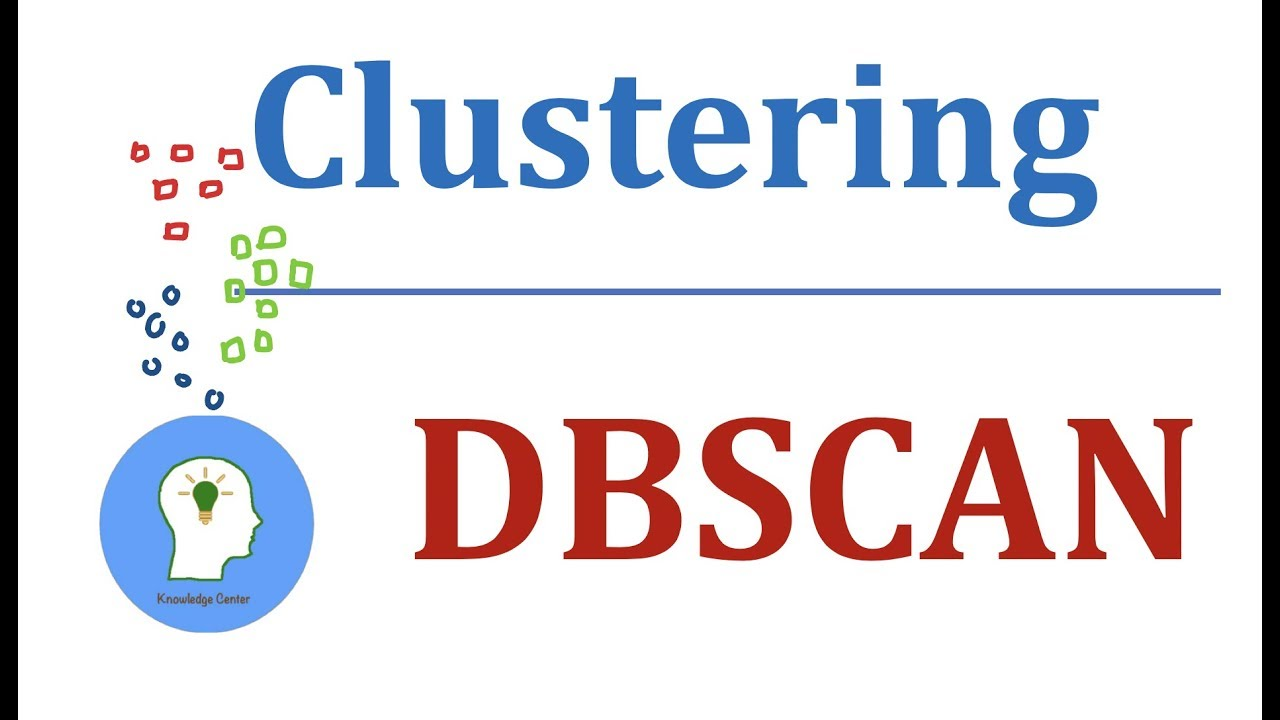

# Density-Based Spatial Clustering of Applications with Noise


---



**Importing all the necessary libraries and requirements. Pandas for reading csv, numpy for mathematical operations, seaborn and matplotlib for various plots, scipy for distance computation, scikitlearn for DBSCAN, scaling, processing and clustering.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

**Reading the CSV file and printing its top five values.**

In [ ]:
country_data = pd.read_csv('/content/Country-data.csv')
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


 **Fetching the information such as column name, count, content(null/non-null), datatype, rows and columns.**

In [ ]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# Defining the clustering target

* Clustering techniques are used to group data/observations in a few segments so that data within any segment are similar while data across segments are different. Defining what we mean when we say “similar” or “different” observations is a key part of cluster analysis which often requires a lot of contextual knowledge and creativity beyond what statistical tools can provide.
* Hence, with the help of heatmap we'll find the correlation between its attributes. Based on that we can find the target variable for clustering.

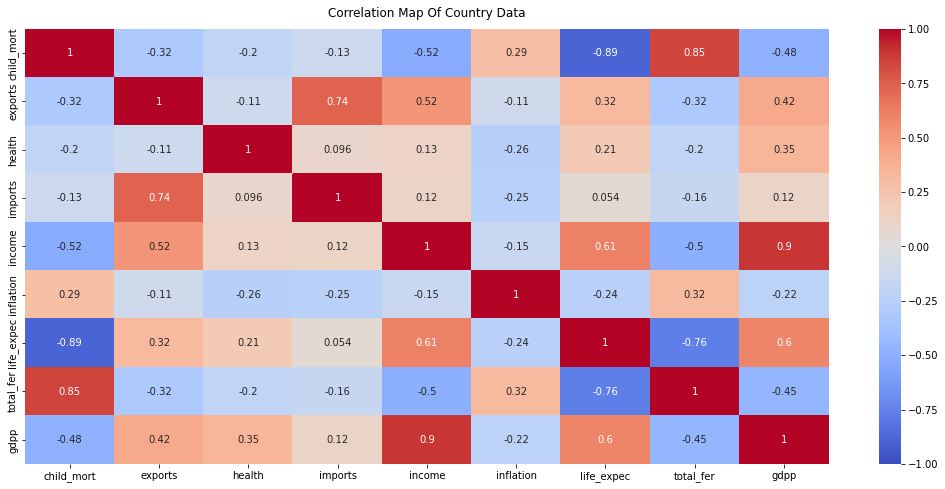

In [ ]:
plt.figure(figsize=(18, 8))
sns.heatmap(country_data.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')
plt.title('Correlation Map Of Country Data', fontdict={'fontsize':12}, pad=12);


**From this heatmap, the top 3 highest positive correlation score:**

* gdpp and income with 0.9
* total_fer and child_mort with 0.85
* imports and exports with 0.74 



In [ ]:
count_data = country_data[['child_mort', 'imports', 'gdpp']]

**To plot clustering between GDPP VS Child Mortality and GDPP VS Imports.**

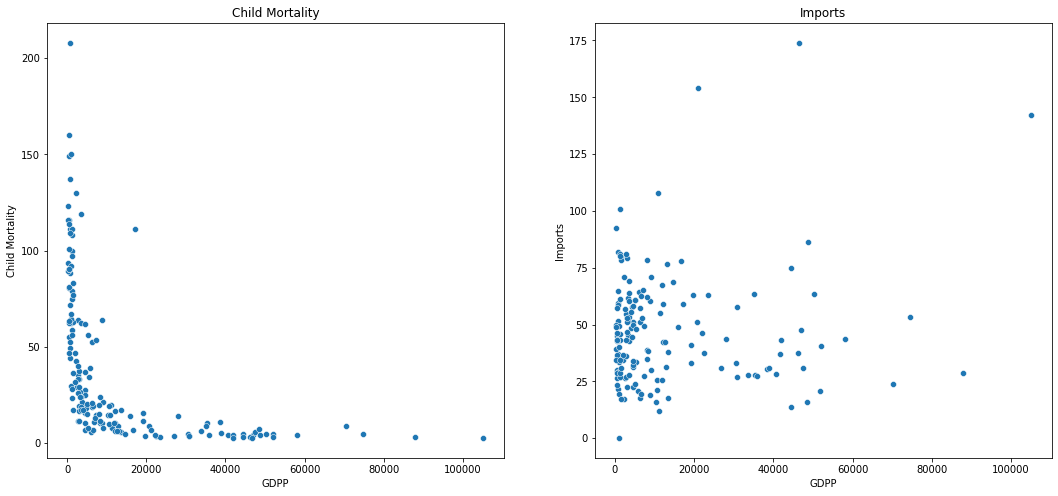

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = count_data)
plt.title('Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = count_data)
plt.title('Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

# DBSCAN


**To determine:**
* epsilon value (Two points are considered neighbors if the distance between the two points is below the threshold epsilon)
* min samples (The minimum number of neighbors a given point should have in order to be classified as a core point)
* identifiction of clusters and present
* to determine the size of cluster
* silhouette score (The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. A silhouette score ranges from -1 to 1, with -1 being the worst score possible and 1 being the best score. Silhouette scores of 0 suggest overlapping clusters.)

In [ ]:
country_clust = count_data.copy()
scaler = StandardScaler()
country_clust_scaled = scaler.fit_transform(country_clust)

for eps in [i/10 for i in range(2,5)]:
    for min_samples in range (7,9):
        print(f'\neps {eps}')
        print(f'\min samples {min_samples}')
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(country_clust_scaled)
        score = silhouette_score(country_clust_scaled, labels)
        
        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')


eps 0.2
\min samples 7
clusters present: [-1  0]
clusters sizes: [156  11]
Silhouette Score: -0.21529913756850436

eps 0.2
\min samples 8
clusters present: [-1  0]
clusters sizes: [156  11]
Silhouette Score: -0.21529913756850436

eps 0.3
\min samples 7
clusters present: [-1  0  1  2]
clusters sizes: [119  30  11   7]
Silhouette Score: -0.1361511565100906

eps 0.3
\min samples 8
clusters present: [-1  0  1]
clusters sizes: [130  29   8]
Silhouette Score: -0.1458651260536372

eps 0.4
\min samples 7
clusters present: [-1  0  1]
clusters sizes: [ 53 101  13]
Silhouette Score: 0.16269123987216677

eps 0.4
\min samples 8
clusters present: [-1  0  1  2]
clusters sizes: [70 78 11  8]
Silhouette Score: 0.08356780586915075


**The best hyperparam are eps: 0.4 and min samples: 7, because it has the highest silhouette score, but samples is inlcuded with noise.**

**Now, we'll fit the values for DBSCAN and predict the cluster type**. 

In [ ]:
dbscan = DBSCAN(eps = 0.4, min_samples = 7)
labels = dbscan.fit_predict(country_clust_scaled)
country_clust['clustdbscan'] = labels

**To plot the clusters after DBSCAN clustering between GDPP VS Child Mortality and GDPP VS Imports. Library used seaborn and matplotlib.**

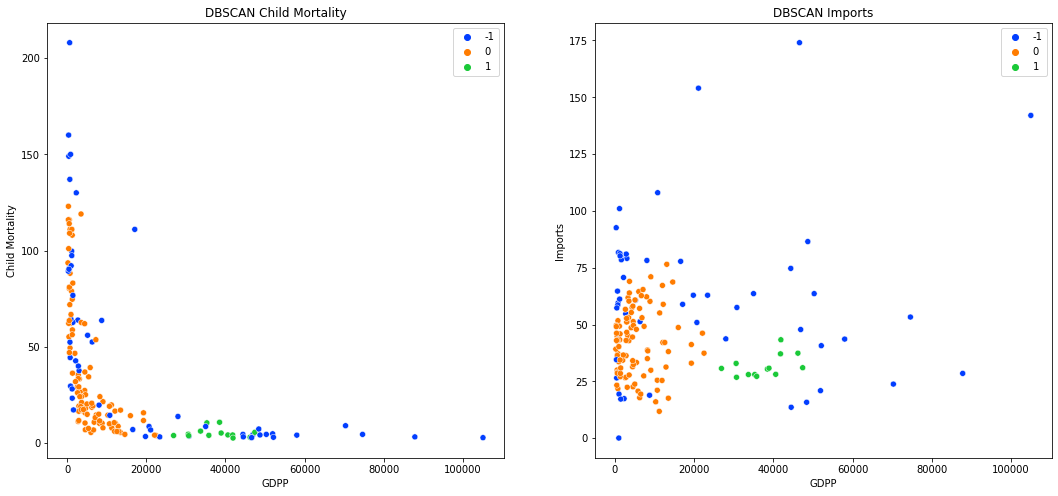

In [ ]:
plt.figure(figsize = (18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = country_clust, hue = 'clustdbscan', palette = 'bright')
plt.legend(loc = 1)
plt.title('DBSCAN Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = country_clust, hue = 'clustdbscan', palette = 'bright')
plt.legend(loc = 1)
plt.title('DBSCAN Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()


In [ ]:
cluster_name = ['Cluster -1', 'Cluster 0', 'Cluster 1']
color = ['Blue', 'Orange', 'Green']
mortality = ['Noise', 'Low GDPP VS Low to Medium Imports', 'Medium GDPP VS Low Imports']
imports = ['Noise', 'Low GDPP VS Medium Imports', 'Medium GDPP VS Medium Imports']
dbscan_summary = pd.DataFrame({'Color': color, 'Name': cluster_name,
                        'Child Mortality': mortality, 'Imports': imports})
dbscan_summary

,Color,Name,Child Mortality,Imports
0,Blue,Cluster -1,Noise,Noise
1,Orange,Cluster 0,Low GDPP VS Low to Medium Imports,Low GDPP VS Medium Imports
2,Green,Cluster 1,Medium GDPP VS Low Imports,Medium GDPP VS Medium Imports


**As a conclusion, we observe the following:**
* Blue cluster as noise 
* Orange cluster as child mortality having low GDPP vs low to medium Imports & Imports having low GDPP vs medoum imports.
* Green cluster as child mortality having medium GDPP vs Low imports & Imports having medium GDPP vs Medium imports.



---


* **With DBSCAN, we can predict 3 clusters accurately along with noise.**